### Which traditional stat is most important?
* Data Needed: Player name, points, assists, rebounds, FG%, team margin

* Find correlation between winning and an imputed stats (points, assists, rebounds, FG%).
  Scatter Plot

In [26]:
# dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np

In [2]:
# read in files
teamPoints = pd.read_csv('output/team_points.csv')
teamWins = pd.read_csv('output/team_wins.csv')

In [3]:
# merge team points and team wins csv files
merged_df = pd.merge(teamPoints,teamWins, on=['Team','Year'],how='outer')
merged_df

,Team,Year,WINorLOSS,TeamPoints,Assists,FieldGoals,TotalRebounds,TeamName,League,Season,Division,Franchise,W,L,%
0,ATL,2014,W,2360,590,859,962,Atlanta Hawks,NaN,(2014-15),Southeast Division,Atlanta Hawks,60,22,73.20%
1,ATL,2015,W,6185,1566,2301,2392,Atlanta Hawks,NaN,(2015-16),Southeast Division,Atlanta Hawks,48,34,58.50%
2,ATL,2016,W,4763,1200,1795,1977,Atlanta Hawks,NaN,(2016-17),Southeast Division,Atlanta Hawks,43,39,52.40%
3,ATL,2017,W,4024,947,1498,1670,Atlanta Hawks,NaN,(2017-18),Southeast Division,Atlanta Hawks,24,58,29.30%
4,ATL,2018,W,1468,357,552,629,Atlanta Hawks,NaN,(2018-19),Southeast Division,Atlanta Hawks,29,53,35.40%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,WAS,2014,W,2273,583,897,959,Washington Wizards,NaN,(2014-15),Southeast Division,Washington Wizards,46,36,56.10%
146,WAS,2015,W,3973,969,1528,1702,Washington Wizards,NaN,(2015-16),Southeast Division,Washington Wizards,41,41,50.00%
147,WAS,2016,W,4708,1123,1807,1872,Washington Wizards,NaN,(2016-17),Southeast Division,Washington Wizards,49,33,59.80%
148,WAS,2017,W,6070,1344,2294,2416,Washington Wizards,NaN,(2017-18),Southeast Division,Washington Wizards,43,39,52.40%


In [4]:
merged_reduced_df = merged_df.loc[:,['Team','W','TeamPoints','Assists','FieldGoals','TotalRebounds']]

In [5]:
merged_grp_teams = merged_reduced_df.groupby('Team')['W','TeamPoints','Assists','FieldGoals','TotalRebounds'].sum().reset_index()

<ipython-input-5-658d23ebefc1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  merged_grp_teams = merged_reduced_df.groupby('Team')['W','TeamPoints','Assists','FieldGoals','TotalRebounds'].sum().reset_index()


In [6]:
traditional_stats = merged_grp_teams.rename(columns={'Team': 'Teams', 
                                                     'W': 'Wins', 
                                                     'TeamPoints': 'Points', 
                                                     'Assists': 'Assists', 
                                                     'FieldGoals': 'Field Goals', 
                                                     'TotalRebounds': 'Rebounds'})
traditional_stats

,Teams,Wins,Points,Assists,Field Goals,Rebounds
0,ATL,204,18800,4660,7005,7630
1,BOS,245,21072,4907,7798,8881
2,BRK,149,11696,2538,4325,4877
3,CHI,182,17120,3821,6349,7594
4,CHO,192,16715,3562,6070,7136
5,CLE,230,23684,5124,8643,9381
6,DAL,182,16043,3484,5946,6354
7,DEN,203,16817,3832,6212,6827
8,DET,193,16533,3470,6254,7232
9,GSW,322,30899,7959,11526,12030


In [7]:
#merged_df.to_csv("output/merged_df.csv", encoding="utf-8", index=False, header=True)

The correlation coefficient for team wins to team points is: 0.9684

the regression equation is: y = 96.68x + -1904.59

the r value is: 0.9684242337446404



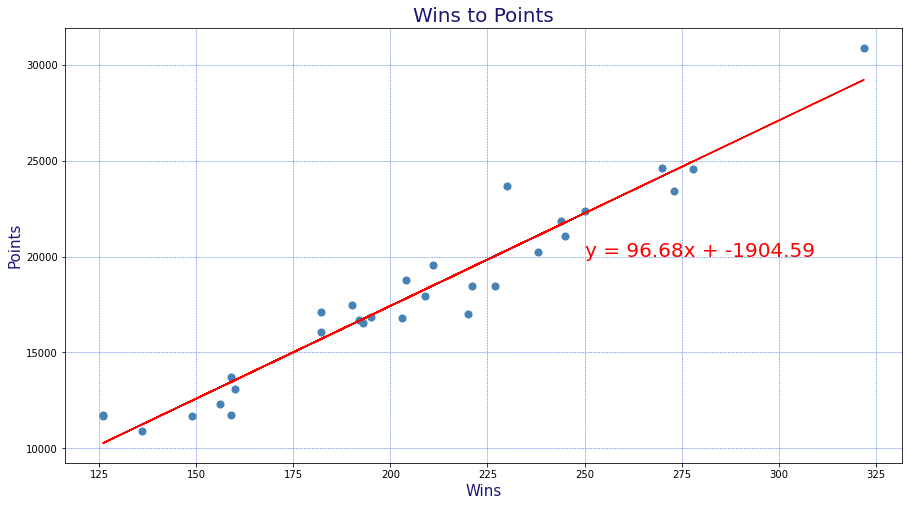

In [37]:
# Calculate the correlation coefficient and linear regression model for wins vs. points
correlation_coefficient = round(sts.pearsonr(traditional_stats['Wins'], traditional_stats['Points'])[0],4)

print(f'The correlation coefficient for team wins to team points is: {correlation_coefficient}\n')

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(traditional_stats['Wins'], traditional_stats['Points'])
regress_values = slope * traditional_stats['Wins'] + intercept
#print(regress_values)

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
print(f'the regression equation is: {equation}\n')
print(f'the r value is: {rvalue}\n')

plt.figure(figsize=(15,8))
plt.scatter(traditional_stats['Wins'], traditional_stats['Points'], s=50, c='steelblue')
#plt.scatter(traditional_stats['Wins'], traditional_stats['Assists'], s=50, c='green')
plt.plot(traditional_stats['Wins'], regress_values, color='red')
plt.title('Wins to Points',fontsize =20, color='midnightblue')
plt.xlabel('Wins',fontsize=15, color='midnightblue')
plt.ylabel('Points',fontsize =15, color='midnightblue')
plt.annotate(equation, xy=(250,20000), fontsize=20, color='red')
plt.grid(color='royalblue', linestyle='--', linewidth=0.5)
plt.show()

The correlation coefficient for team wins to team assists is: 0.9265

the regression equation is: y = 22.84x + -722.88

the r value is: 0.9264555027955629



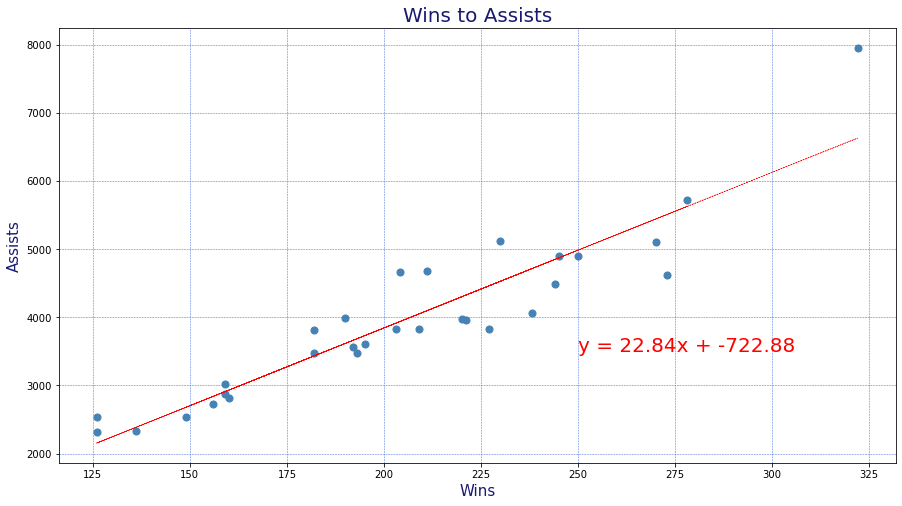

In [54]:
# Calculate the correlation coefficient and linear regression model for wins vs. assists
correlation_coefficient = round(sts.pearsonr(traditional_stats['Wins'], traditional_stats['Assists'])[0],4)

print(f'The correlation coefficient for team wins to team assists is: {correlation_coefficient}\n')

(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(traditional_stats['Wins'], traditional_stats['Assists'])
regress_values = slope * traditional_stats['Wins'] + intercept
#print(regress_values)

equation = 'y = ' + str(round(slope, 2)) + 'x + ' + str(round(intercept, 2))
print(f'the regression equation is: {equation}\n')
print(f'the r value is: {rvalue}\n')
plt.figure(figsize=(15,8))
plt.scatter(traditional_stats['Wins'], traditional_stats['Assists'], s=50, c='steelblue')
plt.plot(traditional_stats['Wins'], regress_values, '--', linewidth=0.5, color='red')
plt.title('Wins to Assists',fontsize =20, color='midnightblue')
plt.xlabel('Wins',fontsize=15, color='midnightblue')
plt.ylabel('Assists',fontsize =15, color='midnightblue')
plt.annotate(equation, xy=(250,3500), fontsize=20, color='red')
plt.grid(color='royalblue', linestyle='--', linewidth=0.5)
plt.show()

Text(0, 0.5, 'stats')

<Figure size 1440x576 with 0 Axes>

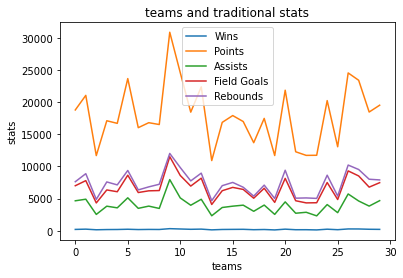

In [57]:
x = traditional_stats.index
y = traditional_stats['Wins']
z = traditional_stats['Points']
xx = traditional_stats['Assists']
xy = traditional_stats['Field Goals']
xz = traditional_stats['Rebounds']

plt.figure(figsize=(20,8))
fig, ax = plt.subplots()


ax.plot(x,y)
ax.plot(x,z)
ax.plot(x,xx)
ax.plot(x,xy)
ax.plot(x,xz)



ax.set_title('teams and traditional stats')
ax.legend(['Wins','Points','Assists','Field Goals','Rebounds'])
ax.xaxis.set_label_text('teams')
ax.yaxis.set_label_text('stats')